In [1]:
import numpy as np
from doubleml.datasets import make_plr_CCDDHNR2018
np.random.seed(1234)
n_rep = 100
n_obs = 5000
n_vars = 20
alpha = 0.5
data = list()
for i_rep in range(n_rep):
    (x, y, d) = make_plr_CCDDHNR2018(alpha=alpha, n_obs=n_obs, dim_x=n_vars, return_type='array')
    data.append((x, y, d))

In [16]:
def non_orth_score(y, d, l_hat, m_hat, g_hat, smpls):
    u_hat = y - g_hat
    psi_a = -np.multiply(d, d)
    psi_b = np.multiply(d, u_hat)
    return psi_a, psi_b

In [17]:
from doubleml import DoubleMLData
from doubleml import DoubleMLPLR
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
face_colors = sns.color_palette('pastel')
edge_colors = sns.color_palette('dark')
np.random.seed(1111)
ml_l = RandomForestRegressor(n_estimators=132, max_features=12, max_depth=5, min_samples_leaf=1)
ml_m = RandomForestRegressor(n_estimators=378, max_features=20, max_depth=3, min_samples_leaf=6)
ml_g = clone(ml_l)

In [18]:
theta_nonorth = np.array([0.52328641, 0.57356639, 0.55810707, 0.5977535 , 0.4813668 , 0.5327912 , 0.61704155, 0.54681571, 0.52857031, 0.6247725 , 0.56574599, 0.42765337, 0.46968109, 0.37845713, 0.48736779, 0.54648086, 0.61232815, 0.45526944, 0.58970519, 0.49146413, 0.61463843, 0.60010516, 0.58994949, 0.47546871, 0.53585469, 0.53000956, 0.51277996, 0.54949396, 0.58818701, 0.48921812, 0.49379525, 0.61029898, 0.56305835, 0.58602554, 0.57746665, 0.47510051, 0.42459541, 0.55138846, 0.51448972, 0.49390206, 0.46970825, 0.48389275, 0.5122035 , 0.35942868, 0.54754709, 0.48853634, 0.53462013, 0.57257894, 0.50344216, 0.7003655 , 0.55803537, 0.5603601 , 0.55943751, 0.53039375, 0.57273209, 0.588119  , 0.60273543, 0.57463947, 0.58192052, 0.39363028, 0.5904183 , 0.70081522, 0.5915527 , 0.68069836, 0.60378249, 0.47595378, 0.57105257, 0.57417753, 0.59693217, 0.49271695, 0.54860756, 0.51489703, 0.44138932, 0.50798106, 0.59197585, 0.46038645, 0.61738642, 0.49256698, 0.46462596, 0.5088013 , 0.48879602, 0.40785025, 0.49317757, 0.52101581, 0.36721687, 0.55132674, 0.6145169 , 0.61903097, 0.60885654, 0.60973684, 0.40244356, 0.46518551, 0.6791729 , 0.56333526, 0.55315272, 0.50280275, 0.48186332, 0.45825446, 0.53875985, 0.54707233, 0.55333261, 0.63615035, 0.51991688, 0.55070896, 0.44300732, 0.69778352, 0.64837045, 0.60167985, 0.50493321, 0.55693924, 0.5686461 , 0.6367919 , 0.43807751, 0.42727251, 0.55899025, 0.512766  , 0.42414525, 0.5123373 , 0.54132912, 0.50466702, 0.50510984, 0.63393837, 0.52571856, 0.6110036 , 0.35394133, 0.64759649, 0.426197  , 0.52952409, 0.5371253 , 0.44604935, 0.49752703, 0.57413701, 0.48082096, 0.48286192, 0.48941886, 0.49669565, 0.61011785, 0.5499223 , 0.38338078, 0.5684348 , 0.62734346, 0.51551337, 0.58548162, 0.39843792, 0.51066774, 0.51682297, 0.41662497, 0.51405945, 0.47680314, 0.57564587, 0.55047709, 0.40895692, 0.48507321, 0.48150446, 0.64835334, 0.55744201, 0.4697698 , 0.4778423 , 0.46274545, 0.72789211, 0.47809226, 0.48196451, 0.551625  , 0.54276761, 0.60078249, 0.55327398, 0.62120112, 0.53889818, 0.57168766, 0.59412325, 0.55290987, 0.61479866, 0.45270291, 0.55090591, 0.49514174, 0.52680104, 0.56749322, 0.56505284, 0.4992059 , 0.55127505, 0.57524686, 0.52585235, 0.53229655, 0.47622374, 0.44488789, 0.50545333, 0.56539543, 0.54838977, 0.57060796, 0.62361319, 0.44563308, 0.5003698 , 0.45594423, 0.46606284, 0.45355246, 0.52816031, 0.57419905, 0.5410551 , 0.53759333, 0.56140027, 0.60997517, 0.63110121, 0.43629724, 0.47555077, 0.49690284, 0.54023968, 0.54261783, 0.49963926, 0.65625668, 0.66449324, 0.43884447, 0.57129263, 0.33584012, 0.47511805, 0.34028965, 0.57814497, 0.53450725, 0.61166678, 0.54127341, 0.54147   , 0.55800002, 0.51160151, 0.58028185, 0.59212372, 0.46545939, 0.55286645, 0.49703378, 0.49730541, 0.58857442, 0.56035477, 0.52518858, 0.66457484, 0.73078869, 0.48474359, 0.52586322, 0.60917992, 0.61026355, 0.41290474, 0.51979286, 0.66831908, 0.42185021, 0.48317411, 0.43697095, 0.64413848, 0.55197041, 0.47930367, 0.56469123, 0.44890795, 0.37844697, 0.35164074, 0.50716352, 0.59215554, 0.60447157, 0.60752355, 0.61793807, 0.44814341, 0.64305071, 0.59159908, 0.65125645, 0.58544308, 0.3600717 , 0.45363031, 0.61097706, 0.52458445, 0.42697636, 0.48711005, 0.55300448, 0.37965628, 0.61771679, 0.5089207 , 0.53578385, 0.43862644, 0.56336916, 0.61680458, 0.62323204, 0.47641849, 0.56843699, 0.54752781, 0.59708379, 0.61883269, 0.50909783, 0.43850491, 0.58974292, 0.49420969, 0.58473545, 0.42414872, 0.69756484, 0.55453778, 0.63226348, 0.55137947, 0.54003995, 0.62681415, 0.51932606, 0.50475418, 0.44882915, 0.5472079 , 0.61434172, 0.57540472, 0.61154333, 0.39089563, 0.59718904, 0.57288303, 0.53569031, 0.47663109, 0.4728607 , 0.60943294, 0.67021391, 0.55689497, 0.59862612, 0.5217708 , 0.4728515 , 0.61083456, 0.4769726 , 0.5025934 , 0.59237259, 0.57291053, 0.55393486, 0.47016436, 0.46321853, 0.57593761, 0.59413597, 0.40312949, 0.69317039, 0.58008741, 0.54355454, 0.46655708, 0.53293769, 0.57314345, 0.58849483, 0.46739483, 0.46984072, 0.51811592, 0.34895571, 0.34717479, 0.58424658, 0.34806726, 0.49737285, 0.41588973, 0.49969555, 0.56463711, 0.58363827, 0.44714116, 0.62826166, 0.47811024, 0.43887814, 0.53916079, 0.59560763, 0.5491493 , 0.48654848, 0.46210772, 0.46522759, 0.57971661, 0.38666085, 0.52764583, 0.6287972 , 0.65112072, 0.50850476, 0.46352321, 0.58135214, 0.57978432, 0.58933261, 0.47563279, 0.56898215, 0.4296174 , 0.68463977, 0.64897991, 0.57323481, 0.66167288, 0.553377  , 0.55324918, 0.40643082, 0.49186567, 0.51094983, 0.43758268, 0.45570856, 0.61405943, 0.4608622 , 0.50980897, 0.34744005, 0.46259612, 0.57727937, 0.42545334, 0.58734005, 0.43360918, 0.73543086, 0.53872757, 0.48093209, 0.61192705, 0.61599023, 0.55635875, 0.48847344, 0.50631136, 0.55652377, 0.46278946, 0.54833289, 0.40865905, 0.58969522, 0.50159954, 0.54574829, 0.51228323, 0.47260273, 0.53563636, 0.49616576, 0.5914049 , 0.47119647, 0.64848706, 0.56442955, 0.53782256, 0.59228539, 0.45564465, 0.55603929, 0.40188956, 0.47684626, 0.56215903, 0.45795109, 0.48627697, 0.63027951, 0.48734554, 0.51792059, 0.41021068, 0.49752463, 0.66428508, 0.40135928, 0.48423971, 0.61611091, 0.5681857 , 0.55489614, 0.57716277, 0.50822594, 0.61446625, 0.63694847, 0.47051379, 0.61684335, 0.50454219, 0.46705443, 0.57543441, 0.62874235, 0.61278484, 0.55511877, 0.49467431, 0.57886118, 0.62086825, 0.52985768, 0.57074016, 0.51147937, 0.43235764, 0.54675407, 0.53570403, 0.47359363, 0.54927324, 0.60401485, 0.44723584, 0.52033308, 0.5283196 , 0.56765117, 0.58193342, 0.50924812, 0.53098169, 0.44647117, 0.5860353 , 0.50867477, 0.47155282, 0.48603775, 0.46297341, 0.48213296, 0.42373343, 0.51347689, 0.537851  , 0.47948647, 0.55109115, 0.41575012, 0.57976377, 0.43576637, 0.49168309, 0.48862993, 0.55380779, 0.53885336, 0.60138872, 0.39765241, 0.60137404, 0.53692952, 0.44201017, 0.60829564, 0.52805651, 0.42568115, 0.43395763, 0.51049196, 0.59671629, 0.53932093, 0.61288662, 0.48532588, 0.44755878, 0.39897815, 0.48546131, 0.52340699, 0.62242501, 0.61332726, 0.47966986, 0.39922943, 0.56655363, 0.47240258, 0.70180277, 0.54329484, 0.57983972, 0.48174702, 0.40806803, 0.38012296, 0.53096472, 0.63231761, 0.49852238, 0.58988759, 0.53035235, 0.57124057, 0.54561548, 0.58162089, 0.48705896, 0.41132108, 0.59653803, 0.50096089, 0.51099718, 0.55140545, 0.55798434, 0.53856297, 0.64601571, 0.61537674, 0.61274748, 0.58409855, 0.48583318, 0.53703224, 0.49489112, 0.64557629, 0.42487364, 0.48796559, 0.47811467, 0.48299745, 0.57026384, 0.62516635, 0.50589203, 0.55423402, 0.52439251, 0.58289281, 0.40879611, 0.50295334, 0.44628286, 0.52906527, 0.50026268, 0.54580796, 0.67054523, 0.59118762, 0.5557291 , 0.37692782, 0.61776855, 0.65028869, 0.51684233, 0.44060372, 0.55010748, 0.46544193, 0.57606724, 0.62861932, 0.50409861, 0.49855097, 0.47795148, 0.63604432, 0.4462969 , 0.56485265, 0.47978807, 0.58513272, 0.55038105, 0.52389705, 0.46400566, 0.39643151, 0.40669508, 0.37131903, 0.54409735, 0.52997155, 0.55972177, 0.4513946 , 0.49035362, 0.53726292, 0.70896823, 0.43129426, 0.64302928, 0.53381332, 0.51589647, 0.61336828, 0.49011946, 0.32064252, 0.46011238, 0.48114897, 0.41438599, 0.6162567 , 0.59125858, 0.53468529, 0.62485751, 0.5643462 , 0.43432088, 0.55723546, 0.55677339, 0.51964121, 0.59753128, 0.44999261, 0.54992742, 0.51795846, 0.47951257, 0.57153128, 0.57908496, 0.4626688 , 0.45531525, 0.44313973, 0.54603293, 0.57576854, 0.46361253, 0.527298  , 0.5620756 , 0.46704174, 0.44964006, 0.44489873, 0.59324251, 0.38614873, 0.7052925 , 0.54426546, 0.57456808, 0.44467559, 0.53451817, 0.46977995, 0.62371312, 0.44698664, 0.60374147, 0.47923972, 0.59966241, 0.45159563, 0.59206654, 0.54386941, 0.42658765, 0.53008371, 0.55862966, 0.4920328 , 0.56761111, 0.52064894, 0.39681885, 0.44574245, 0.65423631, 0.49700968, 0.52949852, 0.69074303, 0.47083257, 0.56112144, 0.61171242, 0.57201577, 0.55023754, 0.50197115, 0.54440172, 0.41029551, 0.55578038, 0.59709186, 0.50556125, 0.60242079, 0.54916367, 0.51934554, 0.65992837, 0.37152973, 0.61838874, 0.55014278, 0.5717791 , 0.48307382, 0.53725693, 0.56510068, 0.56899223, 0.47274061, 0.38206639, 0.57567921, 0.58460404, 0.69554675, 0.44126231, 0.5453808 , 0.55469192, 0.51558473, 0.45490972, 0.32829398, 0.57063905, 0.61816149, 0.4851176 , 0.62280177, 0.55124556, 0.54876465, 0.62502545, 0.53016613, 0.55607373, 0.42591779, 0.47576693, 0.54436353, 0.61658262, 0.72634035, 0.41672421, 0.52000937, 0.55465022, 0.52901531, 0.55834794, 0.58534343, 0.51694802, 0.43374908, 0.66757089, 0.47552899, 0.50901742, 0.61552002, 0.58569846, 0.49247126, 0.62729266, 0.45454611, 0.57492484, 0.36653027, 0.57255697, 0.57824612, 0.53146156, 0.53596233, 0.53638362, 0.46116763, 0.62344651, 0.52368548, 0.43118748, 0.39730289, 0.58060133, 0.51892256, 0.50985834, 0.52621487, 0.45318262, 0.42636468, 0.55077814, 0.51755157, 0.50558189, 0.48513592, 0.60846418, 0.56548573, 0.63888894, 0.64851154, 0.54867037, 0.46621769, 0.51043987, 0.72938861, 0.56584276, 0.56401497, 0.45178682, 0.73033294, 0.46287789, 0.45124177, 0.50136769, 0.3687888 , 0.55620501, 0.56414095, 0.50050497, 0.51400812, 0.51195696, 0.49870403, 0.54124953, 0.51817863, 0.58274345, 0.36739039, 0.6223105 , 0.49839431, 0.48262867, 0.60799173, 0.48497077, 0.50533284, 0.52068533, 0.51819816, 0.53736352, 0.43353299, 0.49234493, 0.6137744 , 0.50568935, 0.40132373, 0.5764364 , 0.48163201, 0.41512117, 0.47245353, 0.49395644, 0.58230514, 0.58230577, 0.50858737, 0.54478675, 0.49901037, 0.55797797, 0.51010655, 0.53948516, 0.55935642, 0.39606487, 0.59820544, 0.47212327, 0.62012946, 0.66593186, 0.58616071, 0.54776001, 0.4611425 , 0.62522599, 0.3766581 , 0.51283615, 0.44134182, 0.5182332 , 0.60188039, 0.4490443 , 0.46919351, 0.47447443, 0.49600183, 0.57066395, 0.52439289, 0.56334611, 0.56060475, 0.39914239, 0.3675798 , 0.51564721, 0.49865563, 0.50048977, 0.51907243, 0.48807419, 0.4837173 , 0.54264044, 0.56838568, 0.54979317, 0.51717151, 0.47623781, 0.45639949, 0.49258588, 0.59268146, 0.58045385, 0.573669  , 0.63253715, 0.42660048, 0.51028837, 0.52477234, 0.60977474, 0.48255809, 0.50034024, 0.58582749, 0.56229419, 0.55128857, 0.67506051, 0.50764811, 0.59438154, 0.42687047, 0.45088934, 0.56769317, 0.69933473, 0.64133968, 0.58965277, 0.52414937, 0.47795837, 0.51327079, 0.47880271, 0.51766668, 0.56479121, 0.42850267, 0.70736401, 0.36848061, 0.56501167, 0.4173219 , 0.59616084, 0.63402178, 0.59863361, 0.40275257, 0.61610026, 0.55072114, 0.54363882, 0.55507125, 0.40734622, 0.54603062, 0.48360112, 0.37964225, 0.49283026, 0.59018895, 0.59009867, 0.4508418 , 0.56922331, 0.61952373, 0.48797082, 0.53357994, 0.463265  , 0.51038265, 0.59259957, 0.40175384, 0.54355008, 0.48951247, 0.51671369, 0.48761615, 0.45277739, 0.60093516, 0.42003811, 0.51235   , 0.59074681, 0.50383085, 0.30816788, 0.58677263, 0.52795737, 0.55613922, 0.53170224, 0.30069634, 0.57035186, 0.57304229, 0.50054292, 0.47112149, 0.5553012 , 0.45457155, 0.59640452, 0.50753294, 0.60960469, 0.54302708, 0.45963418, 0.64439113, 0.40809175, 0.50408166, 0.57626158, 0.54048658, 0.5797436 , 0.58846209, 0.48535104, 0.47475958, 0.62056536, 0.55518476, 0.5876704 , 0.60219568, 0.61776265, 0.65848052, 0.5299857 , 0.51399049, 0.56802533, 0.509565  , 0.48821165, 0.4238927 , 0.57421096, 0.51616527, 0.65465229, 0.46116782, 0.33355847, 0.58515526, 0.55622069, 0.63010995, 0.49775216, 0.54856983, 0.57677015, 0.52546157, 0.53642151, 0.57683734, 0.51020746, 0.45510774, 0.42469847, 0.42367087, 0.38633576, 0.56000824, 0.51460849, 0.57506362, 0.49294988, 0.64173013, 0.45438165, 0.40507967, 0.58082999, 0.4938575 , 0.53151652, 0.61474763, 0.35312902, 0.53849575, 0.48628075, 0.59266678, 0.52805816, 0.52097269, 0.53184868, 0.63211204, 0.66178091, 0.58451712, 0.49163581, 0.61183509, 0.57385018, 0.56755006, 0.58717042, 0.47939109, 0.46031912, 0.41769586, 0.5317388 , 0.57788374, 0.57080485, 0.49382667, 0.63281403, 0.50398231, 0.60290742, 0.43699714, 0.49636521, 0.5053502 , 0.37261477, 0.48081627, 0.50270047, 0.66441706, 0.42627842, 0.53421282, 0.57808942, 0.44486317, 0.58220927, 0.57082553, 0.52144876, 0.5852739 , 0.60581384, 0.47197106, 0.58540418])

se_nonorth = np.array([0.04831872, 0.04832813, 0.0440032 , 0.04114123, 0.04031513, 0.04924838, 0.04834419, 0.04662809, 0.04292674, 0.04538775, 0.04924342, 0.04409527, 0.0417032 , 0.05194798, 0.05030047, 0.0367301 , 0.05075158, 0.05003675, 0.04019231, 0.0408118 , 0.03840654, 0.05299583, 0.04520576, 0.04644108, 0.04959359, 0.03872031, 0.04183655, 0.05109119, 0.05050073, 0.04835535, 0.04488573, 0.0381961 , 0.04422992, 0.04346715, 0.05144883, 0.04486199, 0.04513496, 0.04031142, 0.04932358, 0.04871112, 0.0440838 , 0.03665062, 0.04599354, 0.04412655, 0.04248635, 0.04130969, 0.04234649, 0.05137093, 0.04609058, 0.05068716, 0.0416494 , 0.03860875, 0.04452859, 0.04575008, 0.03959878, 0.04713601, 0.04416249, 0.04282636, 0.04742508, 0.04341061, 0.04468596, 0.04133775, 0.05035144, 0.0429771 , 0.04869872, 0.04490033, 0.04602814, 0.04482479, 0.04350321, 0.0507471 , 0.04018135, 0.04230126, 0.03655288, 0.0468958 , 0.04503343, 0.04182587, 0.04241048, 0.04675773, 0.04176107, 0.04655241, 0.049157  , 0.04956828, 0.04646219, 0.04328973, 0.04411666, 0.04837818, 0.04206927, 0.04889302, 0.05010237, 0.04739132, 0.04636621, 0.04739799, 0.04309182, 0.04921978, 0.04310753, 0.04744372, 0.04151646, 0.04221348, 0.04493263, 0.03779441, 0.04688649, 0.03919651, 0.04590451, 0.05016068, 0.03819017, 0.04131799, 0.04337898, 0.0392395 , 0.04348177, 0.04323946, 0.05393595, 0.04038024, 0.04830559, 0.04124088, 0.05180402, 0.05567998, 0.04244997, 0.03911898, 0.04337131, 0.04624824, 0.04949055, 0.04985597, 0.04326196, 0.04212764, 0.04842716, 0.04561389, 0.04082098, 0.04448624, 0.0448946 , 0.05293593, 0.04388315, 0.04321804, 0.04614838, 0.04602541, 0.04429507, 0.04405809, 0.05071437, 0.05146057, 0.04623581, 0.048504  , 0.04321356, 0.04723778, 0.03439781, 0.04850456, 0.04551087, 0.04798238, 0.03911667, 0.03747808, 0.04200668, 0.04340506, 0.04620754, 0.05201033, 0.05035776, 0.0456115 , 0.04366328, 0.04285165, 0.04355332, 0.04149404, 0.04189363, 0.04271938, 0.043017  , 0.04975933, 0.04724617, 0.0478123 , 0.04583418, 0.05493124, 0.04423306, 0.04228908, 0.04539415, 0.04335721, 0.03785391, 0.04805826, 0.04607728, 0.04239644, 0.04415323, 0.04616612, 0.04793052, 0.05040471, 0.04690316, 0.04168859, 0.04188572, 0.04151215, 0.04243537, 0.04459925, 0.05220799, 0.04072488, 0.03941964, 0.05134895, 0.0484997 , 0.04823143, 0.05272294, 0.0518343 , 0.04815165, 0.04984051, 0.0464933 , 0.03990746, 0.05754139, 0.04443048, 0.03948512, 0.04694665, 0.04627509, 0.04513908, 0.05028515, 0.03946741, 0.04535004, 0.04954032, 0.04290176, 0.04387563, 0.05135577, 0.0504392 , 0.04766801, 0.05580917, 0.04468912, 0.04505744, 0.04120763, 0.04365832, 0.05030036, 0.04299801, 0.05215436, 0.04222343, 0.04385739, 0.04116473, 0.04945468, 0.04284718, 0.04603566, 0.0459052 , 0.04613431, 0.03829818, 0.04267634, 0.04598015, 0.04513768, 0.04448734, 0.05130906, 0.04129426, 0.04086385, 0.04564178, 0.04209469, 0.04482055, 0.04366908, 0.04894291, 0.05089028, 0.0456697 , 0.04560245, 0.04475189, 0.04815378, 0.04657151, 0.04587175, 0.03997987, 0.04141135, 0.04238376, 0.04364734, 0.04414603, 0.05422814, 0.05288109, 0.04474988, 0.04839057, 0.03951434, 0.04106973, 0.04353691, 0.04514385, 0.04276905, 0.04152265, 0.04575897, 0.05536061, 0.04523277, 0.04283036, 0.04593579, 0.04794558, 0.04065449, 0.04222009, 0.04894703, 0.04746394, 0.04702815, 0.04692336, 0.03422089, 0.04594671, 0.05291489, 0.04307596, 0.04955153, 0.04553489, 0.04901159, 0.04473089, 0.04589466, 0.0441002 , 0.046049  , 0.04348205, 0.05187483, 0.04383983, 0.04346503, 0.04739405, 0.04447819, 0.04102896, 0.0431398 , 0.04656729, 0.03896816, 0.0542891 , 0.04270792, 0.04289141, 0.05348902, 0.0495009 , 0.04643517, 0.04410614, 0.04200152, 0.04493118, 0.04806057, 0.04190507, 0.04127871, 0.04847289, 0.04842111, 0.04833609, 0.04889407, 0.05076527, 0.04744793, 0.05150318, 0.04888322, 0.04992893, 0.04023113, 0.03881747, 0.0386972 , 0.04694449, 0.03855655, 0.0457303 , 0.04371627, 0.04143969, 0.03938361, 0.04876415, 0.04742728, 0.04700492, 0.04762283, 0.0488795 , 0.04395567, 0.04441107, 0.05068248, 0.04547187, 0.04361415, 0.05412799, 0.04036971, 0.04535149, 0.04536353, 0.03678323, 0.04403829, 0.04812895, 0.0457191 , 0.04258916, 0.04280755, 0.05153953, 0.04413582, 0.04770393, 0.05038132, 0.03757377, 0.04973624, 0.04261597, 0.0456351 , 0.04472504, 0.04771097, 0.04373888, 0.04370413, 0.04552507, 0.04293194, 0.04761842, 0.04287779, 0.04733812, 0.04423761, 0.0448224 , 0.04636959, 0.04296324, 0.0477725 , 0.04653299, 0.04201292, 0.05075975, 0.05017969, 0.04138296, 0.04060744, 0.04932747, 0.0400757 , 0.05220853, 0.03915695, 0.04293621, 0.06503597, 0.03595801, 0.03622248, 0.04329143, 0.0445115 , 0.03907058, 0.04102573, 0.04438729, 0.04948462, 0.04521646, 0.04211678, 0.04829002, 0.05505099, 0.03515793, 0.04173115, 0.04445393, 0.05032834, 0.05006664, 0.04629111, 0.04772484, 0.04092481, 0.04156632, 0.04229721, 0.04327583, 0.04579568, 0.04716264, 0.04178555, 0.04428462, 0.04725546, 0.04493506, 0.05485039, 0.0442419 , 0.03824128, 0.048013  , 0.04400902, 0.03878737, 0.04157463, 0.03909924, 0.04262371, 0.04611657, 0.03955994, 0.04055998, 0.04706018, 0.04562143, 0.04247859, 0.03936683, 0.04726424, 0.04247808, 0.04722227, 0.05177304, 0.05076287, 0.04027302, 0.038523  , 0.04700016, 0.04626175, 0.04963526, 0.04924924, 0.04556549, 0.03992306, 0.04264629, 0.04201707, 0.0421803 , 0.04335506, 0.04803246, 0.04784608, 0.04146418, 0.03996568, 0.05063166, 0.04452316, 0.04521715, 0.04285809, 0.04856424, 0.04510337, 0.04772573, 0.04363936, 0.04424811, 0.04980449, 0.04387433, 0.04367579, 0.04510261, 0.043214  , 0.0401914 , 0.05182074, 0.03951072, 0.0477948 , 0.04673033, 0.04689404, 0.04998034, 0.04552733, 0.04831458, 0.04267216, 0.04826833, 0.04793905, 0.05178392, 0.04410214, 0.03943804, 0.04291292, 0.0406942 , 0.04885506, 0.04308423, 0.04549851, 0.04976944, 0.05076628, 0.04412881, 0.04532336, 0.04897802, 0.0469969 , 0.04439076, 0.04942879, 0.04328135, 0.04629906, 0.0459189 , 0.03818804, 0.04568807, 0.04147959, 0.05170615, 0.05463537, 0.04573667, 0.04900106, 0.04359653, 0.03808469, 0.04496064, 0.03948091, 0.04690949, 0.04154617, 0.0474799 , 0.04454476, 0.04736569, 0.05066139, 0.04207634, 0.0479254 , 0.04132016, 0.04558345, 0.044382  , 0.04258322, 0.04245783, 0.04792109, 0.03685759, 0.04711378, 0.04406799, 0.04270924, 0.05258154, 0.04412806, 0.04270278, 0.04686045, 0.04326495, 0.04031116, 0.04062513, 0.04254267, 0.0404767 , 0.04825754, 0.04323409, 0.05539793, 0.04773133, 0.04162422, 0.04661492, 0.04853648, 0.03979454, 0.04288096, 0.04452497, 0.04612258, 0.04615601, 0.04294166, 0.05242546, 0.04947169, 0.05055515, 0.04491648, 0.04057551, 0.04777092, 0.04561228, 0.04684564, 0.04517448, 0.04342776, 0.04343005, 0.04704644, 0.04112438, 0.03617482, 0.04135897, 0.05115549, 0.04477676, 0.04699584, 0.05039405, 0.04516071, 0.04827367, 0.04621755, 0.04747895, 0.0479186 , 0.0460015 , 0.04309225, 0.04366407, 0.0392787 , 0.03586747, 0.04604356, 0.03884698, 0.05004952, 0.04139646, 0.04689492, 0.04140696, 0.04730347, 0.04878515, 0.04813615, 0.04342726, 0.05762307, 0.04489961, 0.04359375, 0.04612299, 0.04854138, 0.04527062, 0.04472304, 0.0395711 , 0.0405797 , 0.04505481, 0.04728124, 0.04570094, 0.04527361, 0.03862806, 0.04442718, 0.04443652, 0.04895133, 0.04588046, 0.04839031, 0.04469987, 0.05000096, 0.03906171, 0.051967  , 0.03978374, 0.04194069, 0.04661182, 0.03479072, 0.04340331, 0.04006326, 0.05954248, 0.04160275, 0.04321778, 0.04882777, 0.04787445, 0.04925952, 0.05323071, 0.04701163, 0.05337292, 0.04709804, 0.04334403, 0.04061232, 0.04478596, 0.04398654, 0.04274207, 0.05090697, 0.04455623, 0.04872436, 0.0421355 , 0.04898239, 0.04857274, 0.05415483, 0.04700655, 0.04014555, 0.0480144 , 0.03973658, 0.05139387, 0.04163909, 0.04686196, 0.03972785, 0.04952517, 0.04355752, 0.04586151, 0.04503243, 0.04574733, 0.04706773, 0.05015332, 0.04530172, 0.04176983, 0.04060019, 0.04704383, 0.04182002, 0.03868631, 0.04489151, 0.04019074, 0.04062664, 0.04333441, 0.04373353, 0.0441841 , 0.04185141, 0.04855307, 0.03711605, 0.04173668, 0.05377995, 0.04700167, 0.04350333, 0.04455046, 0.04259438, 0.04334646, 0.04146749, 0.04634779, 0.04688937, 0.04008222, 0.0391518 , 0.04666003, 0.04264922, 0.04064489, 0.04484932, 0.04550754, 0.05596455, 0.04654242, 0.04698534, 0.05086802, 0.04602974, 0.04597451, 0.04194012, 0.04508152, 0.0533805 , 0.04400257, 0.04563091, 0.04757315, 0.04725896, 0.04570736, 0.0478959 , 0.04467469, 0.04802436, 0.04367885, 0.04876105, 0.04211308, 0.04510159, 0.04371484, 0.04133507, 0.04158446, 0.04393359, 0.04355243, 0.04995303, 0.04931508, 0.0381846 , 0.04688839, 0.03784551, 0.04850098, 0.05309496, 0.04718066, 0.04085384, 0.04463436, 0.04367085, 0.04746603, 0.047315  , 0.03405395, 0.04403485, 0.0502298 , 0.04417355, 0.03596471, 0.04452519, 0.04578993, 0.04632251, 0.03958637, 0.04449887, 0.03931985, 0.04310929, 0.03709216, 0.04151165, 0.04229465, 0.04899224, 0.0489364 , 0.04226488, 0.03964909, 0.04748648, 0.04178246, 0.05107194, 0.04452271, 0.05032763, 0.04413235, 0.04676899, 0.04810656, 0.04573807, 0.04076975, 0.05570845, 0.0443732 , 0.04552938, 0.0496156 , 0.04152792, 0.04781586, 0.04225201, 0.0495326 , 0.0443289 , 0.05493486, 0.04521976, 0.0468836 , 0.04401311, 0.04912803, 0.04230038, 0.04714092, 0.03973136, 0.04395779, 0.04519541, 0.04936377, 0.04713223, 0.04564903, 0.04156458, 0.04433356, 0.0505021 , 0.04753149, 0.04174502, 0.056807  , 0.0496208 , 0.04767351, 0.04489522, 0.04642526, 0.05266117, 0.04438333, 0.04227131, 0.05097436, 0.04070389, 0.04836683, 0.04708687, 0.05225942, 0.03992956, 0.04902233, 0.04267317, 0.04477181, 0.03611383, 0.05027674, 0.03796292, 0.05075041, 0.04374405, 0.04413964, 0.0406099 , 0.04255497, 0.04242483, 0.04303759, 0.04170372, 0.04663662, 0.04296794, 0.05192534, 0.0449956 , 0.04730325, 0.0450723 , 0.04445592, 0.04766065, 0.0490991 , 0.04479711, 0.05232366, 0.04572643, 0.04847861, 0.04174633, 0.04394398, 0.0432659 , 0.04822833, 0.04773257, 0.04472821, 0.05111633, 0.04862911, 0.04401816, 0.04236195, 0.04526448, 0.05078418, 0.03735922, 0.04876512, 0.04758175, 0.04562471, 0.04335687, 0.04624443, 0.04618243, 0.04639856, 0.03822104, 0.0572194 , 0.04308923, 0.0419536 , 0.03811534, 0.03959254, 0.04130681, 0.05258445, 0.04986443, 0.04372495, 0.05031003, 0.05073988, 0.04547629, 0.050313  , 0.05054227, 0.04252951, 0.05065258, 0.04641125, 0.04230864, 0.04063602, 0.04855955, 0.04236878, 0.04650167, 0.03732677, 0.05326182, 0.04636859, 0.04556033, 0.04708447, 0.04356933, 0.04375771, 0.05121428, 0.04205749, 0.0518704 , 0.04518894, 0.04231454, 0.04398824, 0.05386235, 0.04887486, 0.04226957, 0.03547307, 0.04334838, 0.05197605, 0.04584531, 0.04269476, 0.04454851, 0.04730934, 0.05087434, 0.04269729, 0.04609613, 0.04301385, 0.04510682, 0.04449971, 0.04376506, 0.04954276, 0.04427552, 0.03896203, 0.04919564, 0.04771758, 0.04393024, 0.03870266, 0.0406708 , 0.0469429 , 0.04648953, 0.04738561, 0.04893255, 0.04408171, 0.04506601, 0.05193102, 0.04054061, 0.05030557, 0.04590494, 0.04596106, 0.04486667, 0.04068828, 0.0439199 , 0.0445398 , 0.05113532, 0.04578913, 0.0427432 , 0.04100801, 0.04285793, 0.04261937, 0.04108686, 0.04369689, 0.04362722, 0.03982833, 0.04838574, 0.05134018, 0.04221049, 0.04859673, 0.04196777, 0.05194669, 0.05153446, 0.04606078, 0.04232377, 0.0469268 , 0.04235938, 0.04001685, 0.04145275, 0.05063048, 0.04944555, 0.0413224 , 0.04250659, 0.04647227, 0.04430456, 0.04549796, 0.04603226, 0.04760732, 0.03799237, 0.0473626 , 0.04558186, 0.0486614 , 0.04415898, 0.04871813, 0.04439888, 0.044249  , 0.04096636, 0.04800334, 0.04382408, 0.04466881, 0.04820415, 0.04541524, 0.04297626, 0.04546258, 0.04837869, 0.04856685, 0.04739173, 0.04542921, 0.04363037, 0.04663879, 0.03848235, 0.04428369, 0.04391203, 0.04583622, 0.04338766, 0.04707669, 0.04744157, 0.03843356, 0.04494826, 0.05118331, 0.04920233, 0.04636591, 0.04606445, 0.04217975, 0.04145861, 0.04620102, 0.04249437, 0.03885329, 0.04489372, 0.04626471, 0.04990879, 0.04971651, 0.04811536, 0.0440326 , 0.04365409, 0.04810089, 0.04607049, 0.0445267 , 0.04082594, 0.04242013, 0.04945364, 0.04470348, 0.04007413, 0.04396535, 0.05119831, 0.04607697])


# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
#for i_rep in range(1):
for i_rep in range(n_rep):
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr_nonorth = DoubleMLPLR(obj_dml_data,
                                      ml_l, ml_m, ml_g,
                                      n_folds=2,
                                      apply_cross_fitting=False,
                                      score=non_orth_score)
    obj_dml_plr_nonorth.fit()
    this_theta = obj_dml_plr_nonorth.coef[0]
    this_se = obj_dml_plr_nonorth.se[0]
    print(np.abs(theta_nonorth[i_rep] - this_theta))
    print(np.abs(se_nonorth[i_rep] - this_se))
    theta_nonorth[i_rep] = this_theta
    se_nonorth[i_rep] = this_se


0.039841342311771166
0.03481693228465414
0.05806166230340226
0.03428849351652735
0.04872344037563503
0.030105339772668917
0.058461747451934554
0.027452382236487913
0.048275788368503436
0.026522469982527407
0.036010227464620126
0.03473500123519425
0.07800066019621243
0.03414410360333829
0.0364900262261495
0.03319382662257345
0.03383604997478007
0.028818241743766168
0.1355401631157585
0.031507284230129856
0.0256812118691927
0.035822320270761335
0.08682539082583357
0.03118834550931071
0.04228042327091741
0.027901083667553853
0.14184285131195645
0.03778895820804234
0.038613835672485275
0.03595829532756996
0.02117613593403489
0.022303857274481077
0.06731883025981411
0.03611964956673676
0.06152261587046448
0.035534898535815665
0.05440333645296258
0.02550597661254199
0.07492532822810938
0.0266648363719312
0.0808339516080725
0.02377151824943513
0.09900837726609812
0.039320361751746385
0.06749996619127296
0.03099081214491558
0.04136896745355434
0.03239170242331149
0.035701651798936695
0.0355586

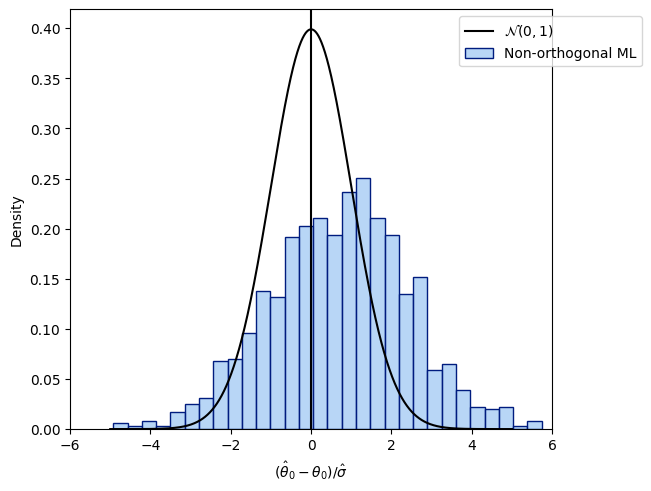

In [19]:
plt.figure(constrained_layout=True);
ax = sns.histplot((theta_nonorth - alpha)/se_nonorth,
                  color=face_colors[0], edgecolor = edge_colors[0],
                  stat='density', bins=30, label='Non-orthogonal ML');
ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
ax.set_xlim([-6., 6.]);
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');